# Open CV Image Processing

Functions straight from OpenCV and other online resources to do simple thresholding, adaptive thresholding, and dodging/burning (sketches). Examples from the FLIR ADAS dataset.

Refs: 

- https://docs.opencv.org/master/d6/d00/tutorial_py_root.html
- https://medium.com/analytics-vidhya/create-your-own-sketch-with-opencv-638a463c6ec6
- https://subscription.packtpub.com/book/application-development/9781785282690/1/ch01lvl1sec10/creating-a-black-and-white-pencil-sketch


In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# Loading exposure images into a list
A = cv.imread('samples/FLIR_09935_T.bmp') # raw
A_ = cv.cvtColor(A, cv.COLOR_BGR2GRAY) # grayscaled

B = cv.imread('samples/FLIR_09935_V.bmp')
B_ = cv.cvtColor(B, cv.COLOR_BGR2GRAY)
B2 = cv.cvtColor(B, cv.COLOR_BGR2RGB)

C = cv.imread('samples/bernard-489_T.bmp') # raw
C_ = cv.cvtColor(C, cv.COLOR_BGR2GRAY) # grayscaled

D = cv.imread('samples/bernard-489_V.bmp')
D_ = cv.cvtColor(D, cv.COLOR_BGR2GRAY)
D2 = cv.cvtColor(D, cv.COLOR_BGR2RGB)

In [6]:
def simple_thresh(pic): # change 127 for pixel range to 255
    img = pic
    ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
    ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
    ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
    ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
    titles = ['Original Image','BINARY','BINARY_INV',
              'TRUNC','TOZERO','TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    
    plt.figure(figsize=(20,12))
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

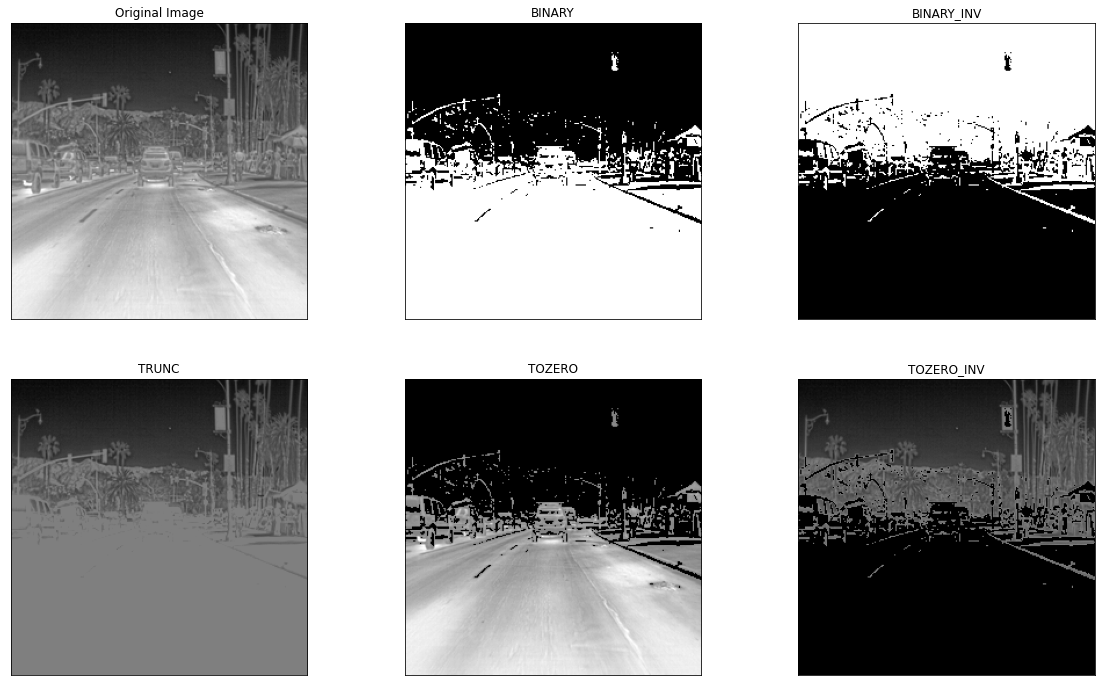

In [7]:
simple_thresh(A_)

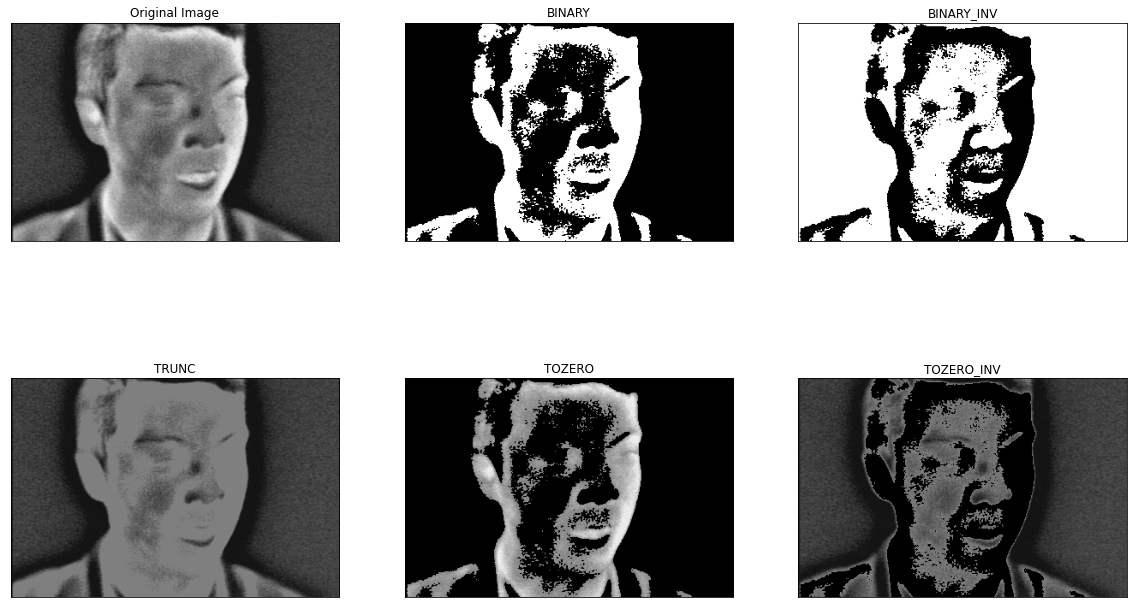

In [22]:
simple_thresh(C_)

In [8]:

#The function transforms a grayscale image to a binary image
def tozero(pic, itspair):
    img = pic
    itspair = cv.cvtColor(itspair, cv.COLOR_BGR2RGB)
    ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_TOZERO) #127 b/c it's about half the pixel range
    ret,thresh2 = cv.threshold(img,115,255,cv.THRESH_TOZERO_INV)
    titles = ['Original Image','TOZERO','TOZERO_INV', 'Its Pair']
    images = [img, thresh1, thresh2, itspair]
    
    plt.figure(figsize=(20,12))
    for i in range(4):
        plt.subplot(1,4,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

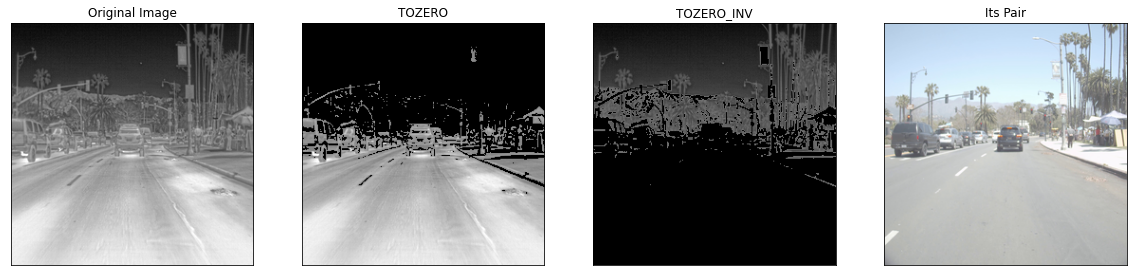

In [9]:
tozero(A_, B)

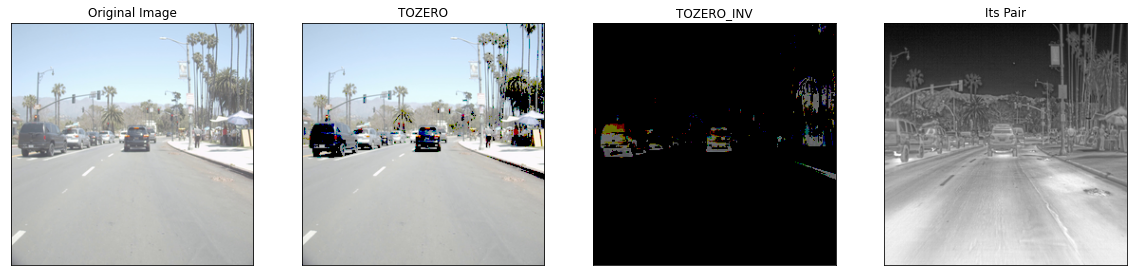

In [10]:
tozero(B2, A_)

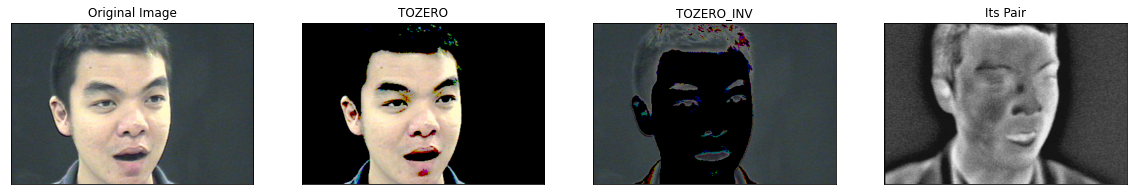

In [23]:
tozero(D2, C_)

In [11]:
def sketch(pic, itspair):
    
    def dodge_img(x,y):
        return cv.divide(x,255-y,scale=256)
    
    def burn_img(image, mask):
        return 255-(cv.divide(255-image, 255-mask, scale=256))

    #pic needs to be raw, not grayscaled
    img = pic
    itspair = cv.cvtColor(itspair, cv.COLOR_BGR2RGB)
    
    img_invert =cv.bitwise_not(img)
    img_invert = cv.cvtColor(img_invert, cv.COLOR_BGR2RGB)
    
    gblur_img = cv.GaussianBlur(img_invert,(21,21),sigmaX=0,sigmaY=0)
    gblur_img = cv.cvtColor(gblur_img, cv.COLOR_BGR2RGB)
    
    dodged_img = dodge_img(img, gblur_img)
    dodged_img = cv.cvtColor(dodged_img, cv.COLOR_BGR2RGB)
    
    final_img = burn_img(dodged_img, gblur_img)
    final_img = cv.cvtColor(final_img, cv.COLOR_BGR2RGB)
    
   
    titles = ['Original Image',
              'Inverted',
              'Blurred',
              'Dodged',
             'Dodged & Burned',
             'PAIR']
    
    images = [img, img_invert, gblur_img, dodged_img, final_img, itspair]
    
    plt.figure(figsize=(20,12))
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

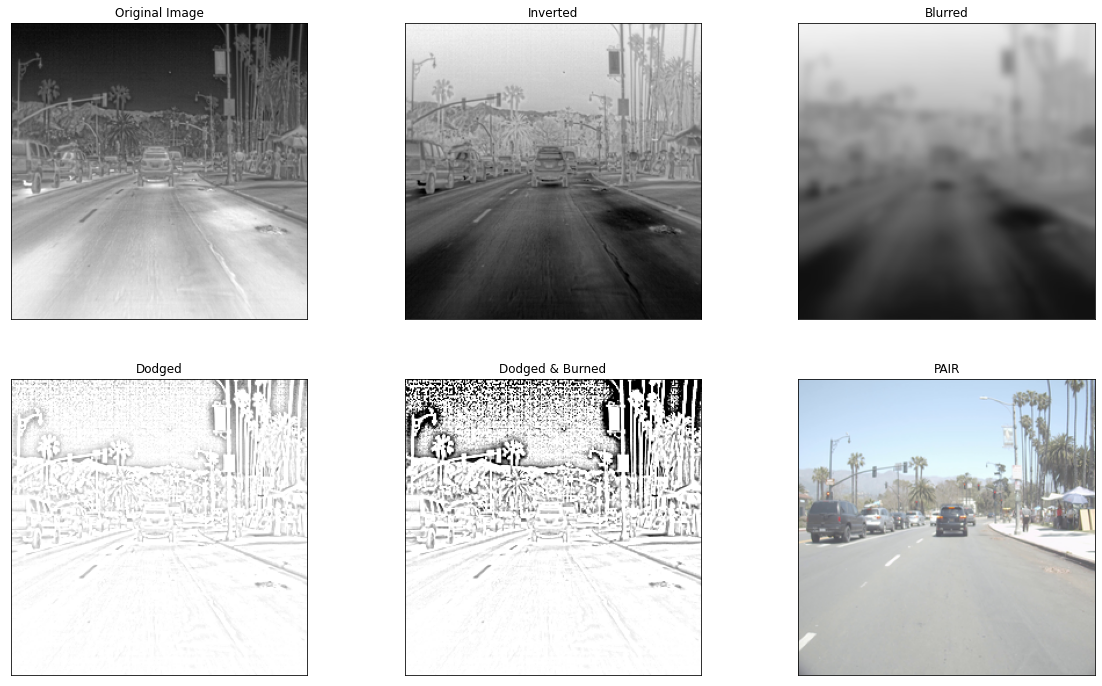

In [12]:
sketch(A,B)

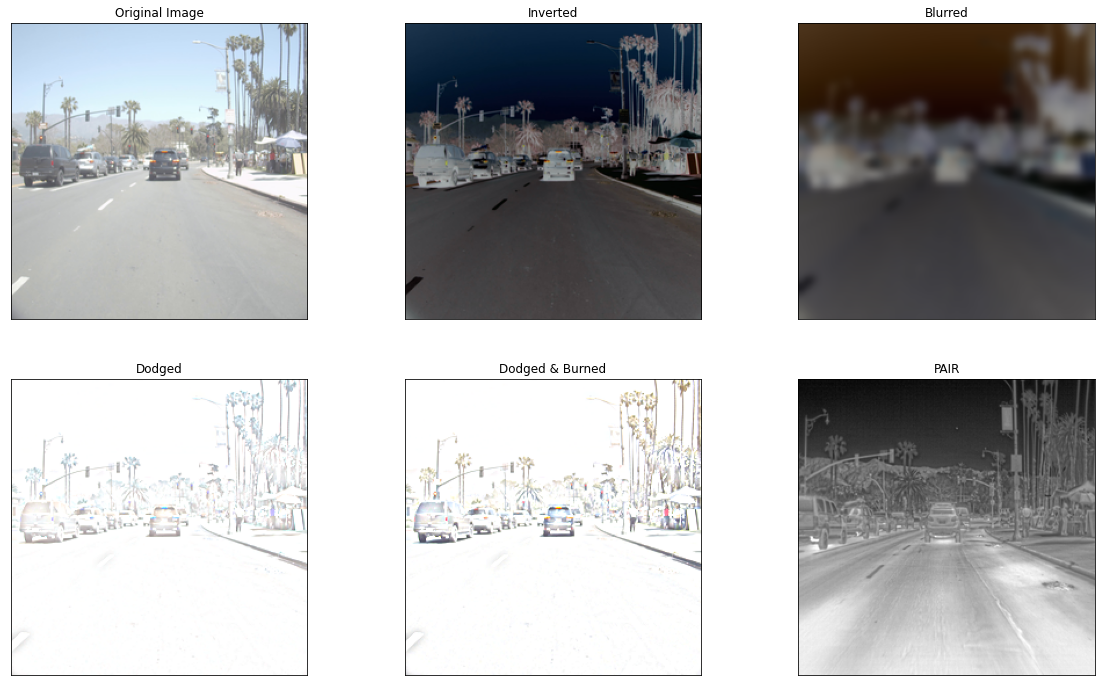

In [13]:
sketch(B2,A)

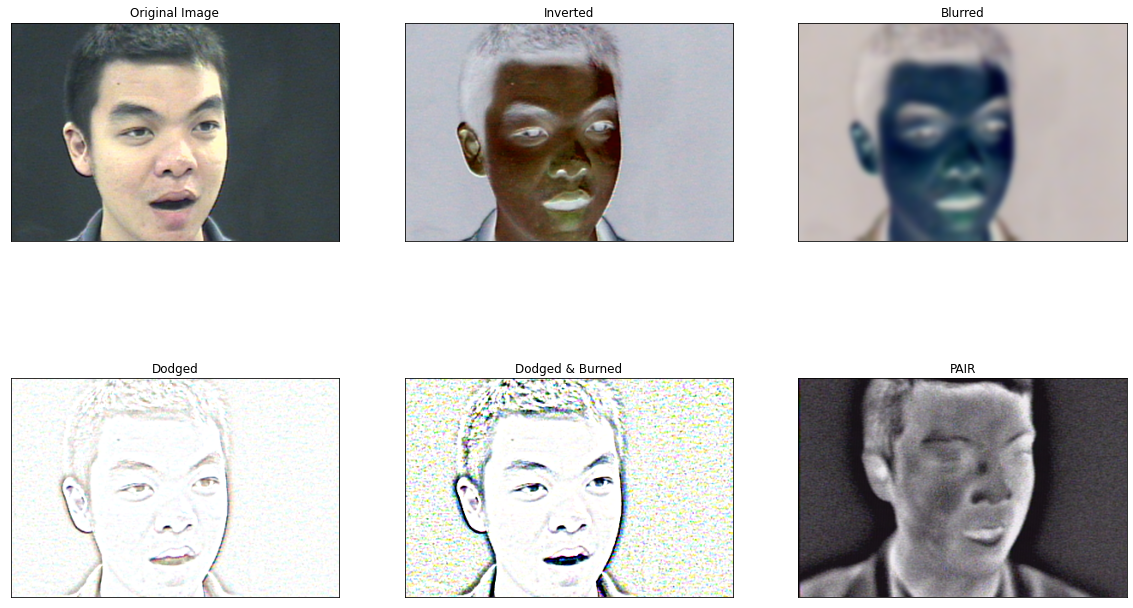

In [24]:
sketch(D2,C)

In [15]:
def adaptive(pic, itspair):

    img = cv.medianBlur(pic,5) # NEED TO APPLY A BLUR
    itspair = cv.cvtColor(itspair, cv.COLOR_BGR2RGB)

    ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
    th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding', 'Its Pair']

    images = [pic, th1, th2, th3, itspair]

    plt.figure(figsize=(35,12))
    for i in range(5):
        plt.subplot(1,5,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

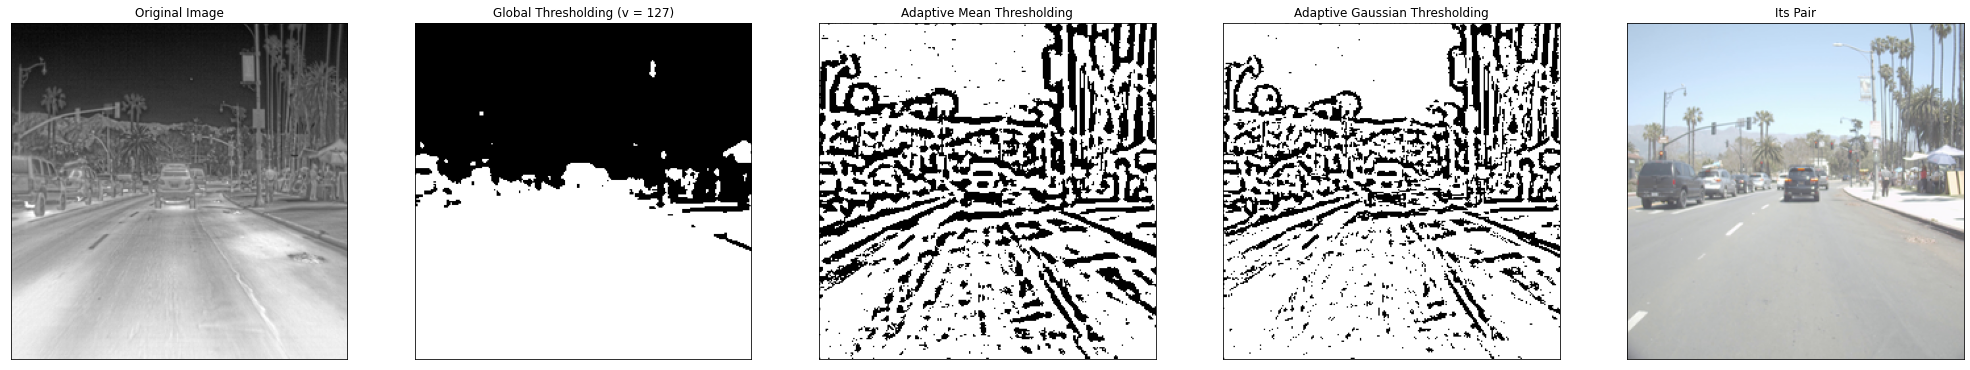

In [16]:
adaptive(A_, B)

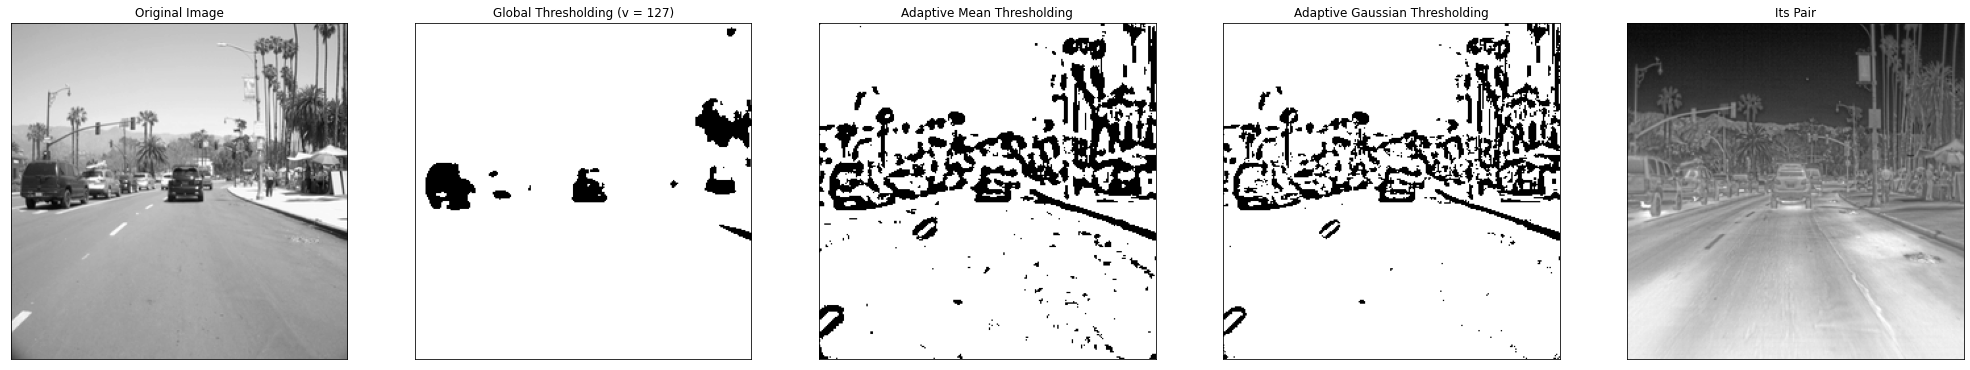

In [18]:
adaptive(B_, A)

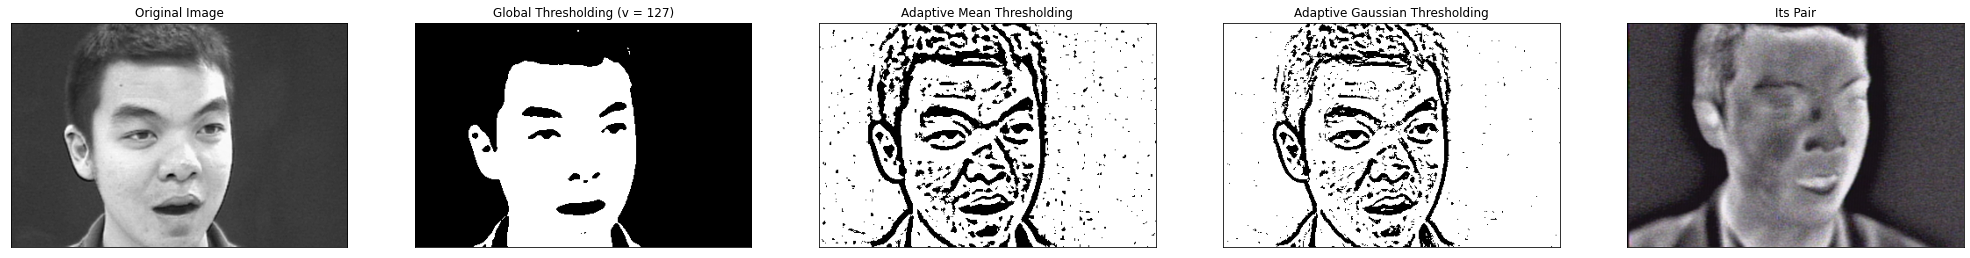

In [25]:
adaptive(D_, C)

In [27]:
def otsu(pic):
    
    img = pic
    # global thresholding
    ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # Otsu's thresholding after Gaussian filtering
    blur = cv.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # plot all the images and their histograms
    images = [img, 0, th1,
              img, 0, th2,
              blur, 0, th3]
    titles = ['Original Noisy Image','Histogram',
              'Global Thresholding (v=127)',
              'Original Noisy Image',
              'Histogram',
              "Otsu's Thresholding",
              'Gaussian filtered Image',
              'Histogram',
              "Otsu's Thresholding"]
    plt.figure(figsize=(20,12))
    for i in range(3):
        plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
        plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
        plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
        plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()

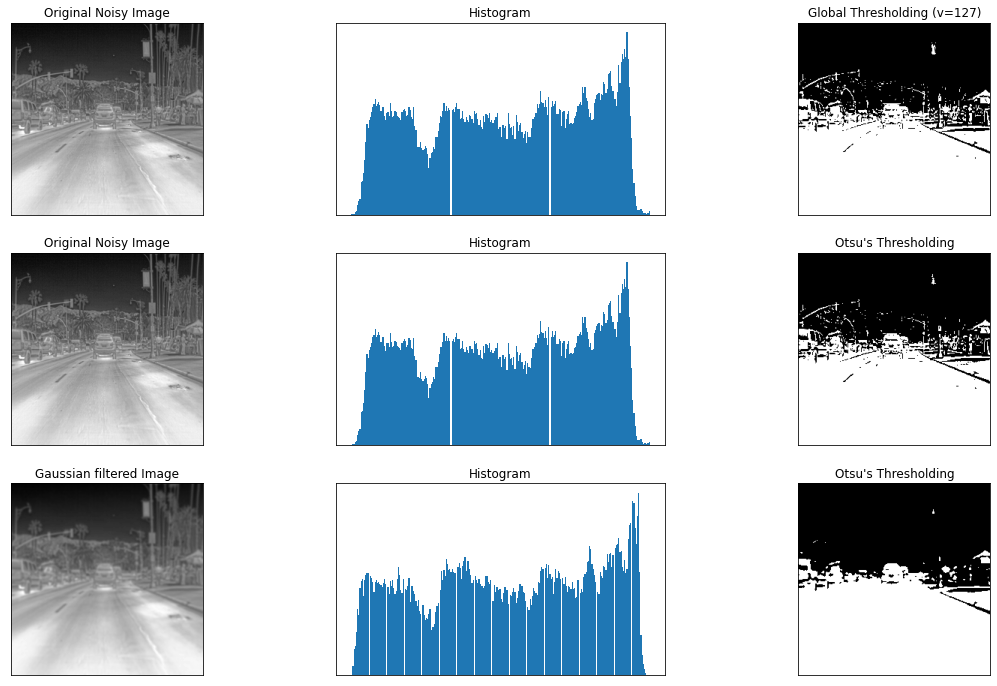

In [29]:
otsu(A_)

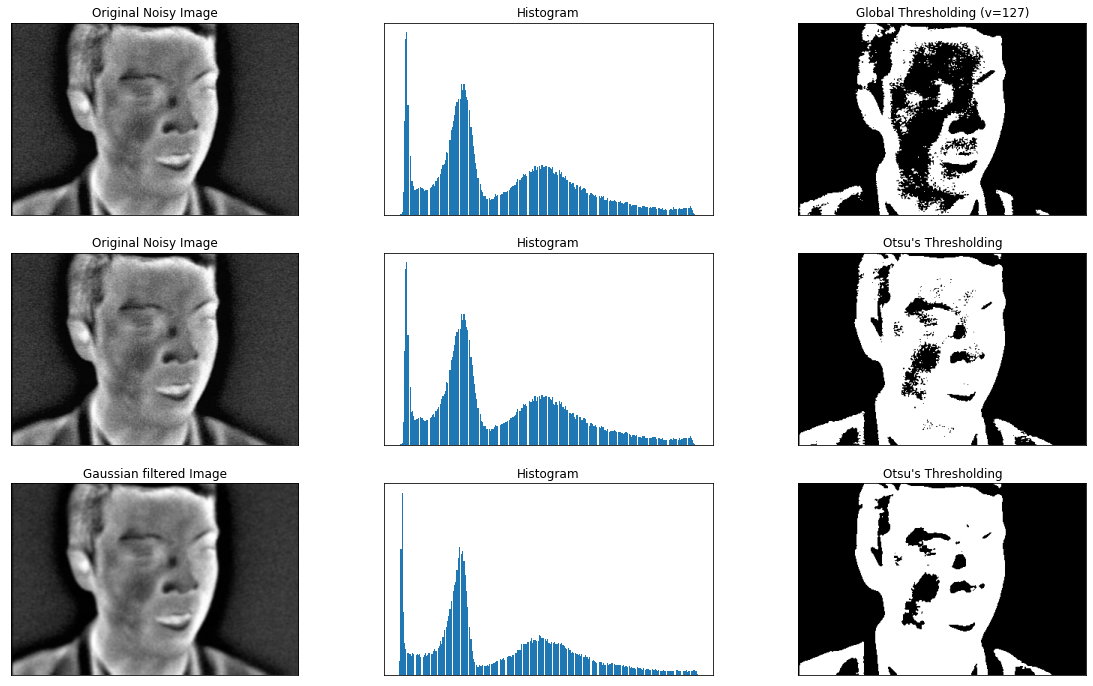

In [30]:
otsu(C_)